# Matplotlib 笔记


## Install

通过 `Anaconda` 安装。

**Step 1**：通过 `Anaconda ` 创建一个新的环境

```bash
conda create -n matplotlib
```

**Step 2**：激活 `matplotlib` 环境

```bash
# OS:Windows
conda activate matplotlib

# OS:Mac OS X
source activate matplotlib
```

**Step 3**：安装 `matplotlib` 包

```bash
# install matplotlib packages
conda install -c conda-forge matplotlib

# update matplotlib packages
conda update --all
```

## Usage Guide

### Figure

**Parts of a Figure**

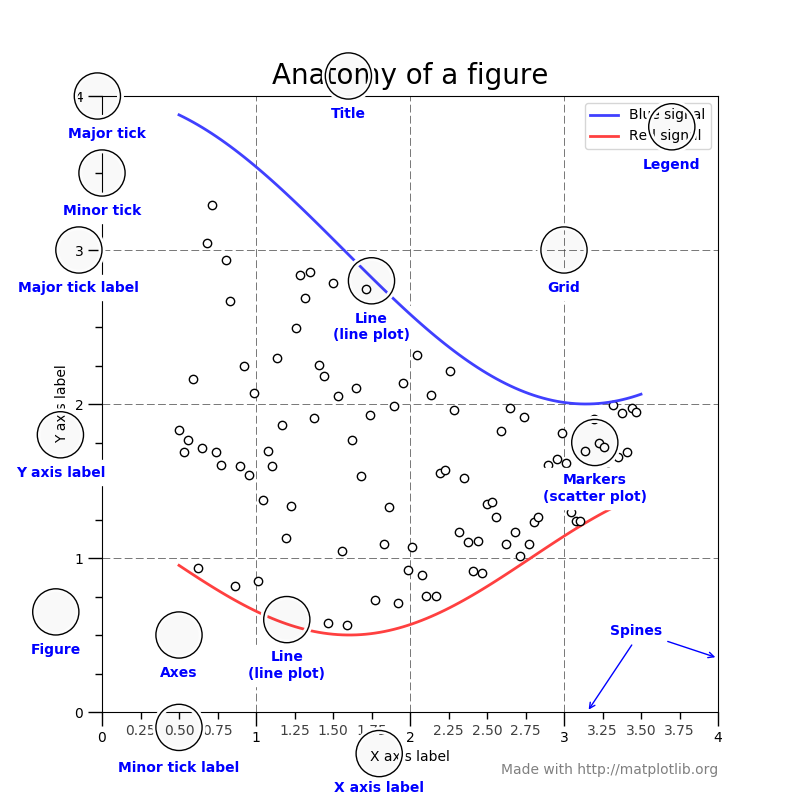

The **whole** figure. The figure keeps track of all the child `Axes`, a smattering of 'special' artists (titles, figure legends, etc.), and the **canvas**. A figure can have any number of `Axes`, but to be useful should have at least one.


In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure() # an empty figure with no axes
fig.suptitle('No axes on this figure') # Add a title so we know which it is
plt.show()

<Figure size 432x288 with 0 Axes>

上面的图表没有显示出来，是因为在 `jupyter` 中没有 `Axes` 是不予显示的。如果想看效果可以在命令行下的 `ipython` 中查看。

画4个 `Axes`

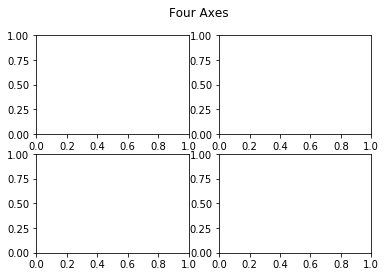

In [26]:
fig = plt.figure()
fig.suptitle('Four Axes')
fig.subplots(2, 2)
plt.show()

### Axes

This is what you think of sa 'a plot', it is region of the image with the data space. A give figure can contain many Axes, but a give `Axes` object can only be in on `Figure`. The Axes contains two (or three in the case of 3D) `Axis` objects.

### Axis

These are the number-line-like objects.

### Artist

Basically everything you can see on the figure is an artist (event the Figure, Axes, and Axis objects).

### Types of inputs to plotting functions

All of plotting functions expect `np.array` or `np.ma.masked_array` as input. Classes that are 'array-like' such as `panda` data object and `np.matrix` may or may not work as intended. It is best to convert these to `np.array` objects prior to plotting.

For example, to convert a `pandas.DataFrame`

In [19]:
import pandas

a = pandas.DataFrame(np.random.rand(4, 5), columns=list('abcde'))
print(a, '\n')
a_as_ndarray = a.values
print(a_as_ndarray)

          a         b         c         d         e
0  0.907305  0.782939  0.026997  0.677464  0.385367
1  0.863983  0.126165  0.392893  0.314451  0.853375
2  0.076606  0.932719  0.929935  0.366033  0.322022
3  0.260112  0.456873  0.814938  0.505609  0.080895 

[[0.9073048  0.78293949 0.02699716 0.67746353 0.38536669]
 [0.86398292 0.12616479 0.39289313 0.31445072 0.85337512]
 [0.07660608 0.93271913 0.92993464 0.36603334 0.32202245]
 [0.26011217 0.45687329 0.81493787 0.50560889 0.08089527]]


and to convert a `np.matrix`

In [20]:
b = np.matrix([[1, 2], [3, 4]])
b_as_ndarray = np.asarray(b)
print(b, '\n')
print(b_as_ndarray)

[[1 2]
 [3 4]] 

[[1 2]
 [3 4]]


### Matplotlib, pyplot and pylab: how are thery related?

- **Matplotlib** is the whole package
- **matplotlib.pyplot** is a module in matplotlib
- **pylab** is a module that gets installed alongside matplotlib

Pyplot provides the state-machine interface to the underlying object-oriented plotting libary. The state-machine implicity and automatically create figures and axes to achieve the desired plot. For example:

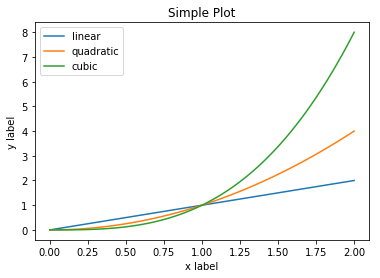

In [24]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title('Simple Plot')

plt.legend()

plt.show()

### Performance

#### Line segement simplification

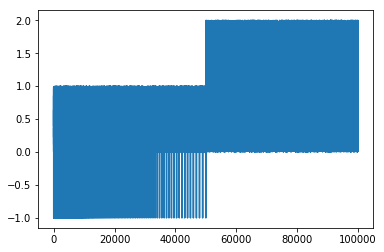

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['path.simplify_threshold'] = 0.0
plt.plot(y)
plt.show()


上面的代码很慢，下面的代码秒出，主要是 `path.simpylify` 和 `path.simpylify_threshold` 参数起的作用

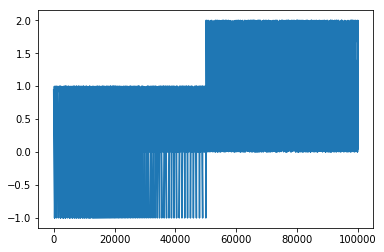

In [30]:
mpl.rcParams['path.simplify_threshold'] = 1.0
plt.plot(y)
plt.show()